# Urban Observatory Newcastle University
- Author: Sedar Olmez
- Data source: http://newcastle.urbanobservatory.ac.uk/
- Description: Try downloading live sensory data from Newcastle to gain insight on the movement of people across the city. This will then be part of a pipeline system that inputs the data into an agent based model to simulate. 

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import requests
import pandas as pd
import io

In [3]:
def GeoJSON(data={}, metadata={}):
    bundle = {
            'application/geo+json': data,
            'text/plain': '<IPython.display.GeoJSON object>'
    }
    metadata = {
        'application/geo+json': metadata
    }
    display(bundle, metadata=metadata, raw=True)

# Retrieve sensor information:

In [4]:
sensor_params = dict(
    sensor_type = 'Walking North'
)

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text) )
sensor_info

,Sensor Name,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude
0,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146
1,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61191367348244 54.9742360249308),43.700001,2.0,People Counting API,False,-1.611914,54.974236
2,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61159110417673 54.9742892668984),43.610001,2.0,People Counting API,False,-1.611591,54.974289
3,PER_PEOPLE_NORTHUMERLAND_LINE_MID_DISTANCE_HEAD_0,POINT (-1.61187546061534 54.974385788398),43.849998,2.0,People Counting API,False,-1.611875,54.974386
4,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61158161684422 54.9742039587214),43.480000,2.0,People Counting API,False,-1.611582,54.974204
5,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61221107799805 54.9748085841739),44.549999,2.0,People Counting API,False,-1.612211,54.974809
6,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054
7,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61149967779594 54.9741066654557),43.290001,2.0,People Counting API,False,-1.611500,54.974107
8,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61208941972901 54.9748314715766),44.639999,2.0,People Counting API,False,-1.612089,54.974831


Now that we have all sensors of type Walking North. We can try get the data these sensors capture. 

In [5]:
# Time to plot the sensors on a map.
import smopy
import matplotlib.patheffects as pe

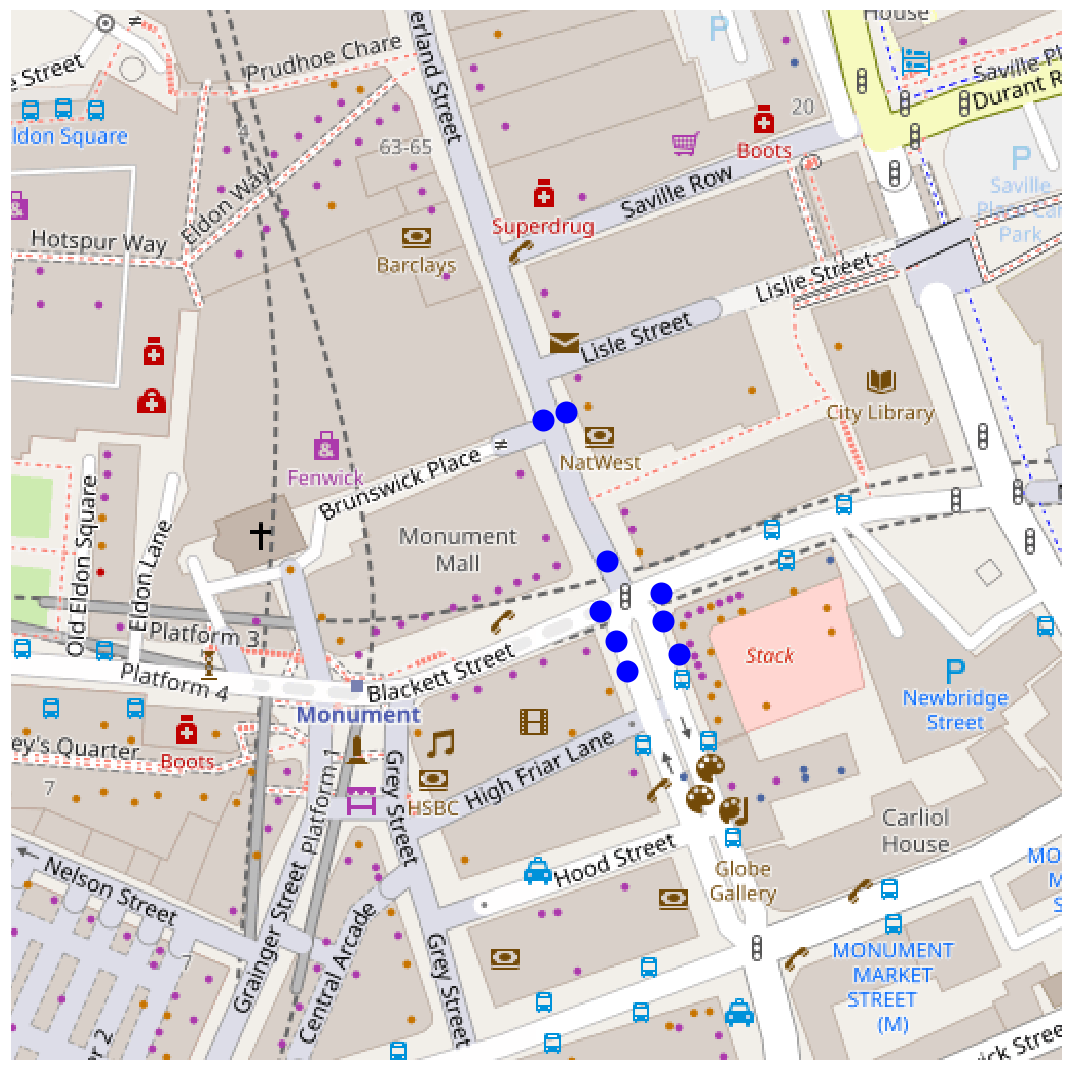

In [6]:
black_box = (
    min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(black_box, z = 17)
ax = map.show_mpl(figsize=(15, 15))

for i, row in sensor_info.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms = 20, mew = 2);

# Setting up data parameters

In [35]:
import datetime

api_date_format = "%Y%m%d%H%M%S"

start_time = datetime.datetime(2019, 9, 18, 0)
end_time = datetime.datetime(2019, 9, 19)

data_parameters = dict(
    data_variable = 'Walking North',
    agg_method = 'median',
    agg_period = '5mins',
    starttime = start_time.strftime(api_date_format),
    endtime = end_time.strftime(api_date_format)
)

data_parameters.update(sensor_params)
data_parameters

{'agg_method': 'median',
 'agg_period': '5mins',
 'data_variable': 'Walking North',
 'endtime': '20190919000000',
 'sensor_type': 'Walking North',
 'starttime': '20190918000000'}

**Get aggregated data**

In [36]:
r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/data/agg/csv/',data_parameters)
r

<Response [200]>

**Read the data into a dataframe**

In [37]:
pedestrian_step_count_data = pd.read_csv(io.StringIO(r.text))
pedestrian_step_count_data.head(10)

,Sensor Name,Variable,Units,Timestamp,Value,Flagged as Suspect Reading,Aggregated Method,Number of records,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude
0,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,Walking North,People,2019-09-18 00:05:00,2.0,False,Median,1,POINT (-1.61221107799805 54.9748085841739),44.549999,2.0,People Counting API,False,-1.612211,54.974809
1,PER_PEOPLE_NORTHUMERLAND_LINE_MID_DISTANCE_HEAD_0,Walking North,People,2019-09-18 00:05:00,1.0,False,Median,1,POINT (-1.61187546061534 54.974385788398),43.849998,2.0,People Counting API,False,-1.611875,54.974386
2,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,1.0,False,Median,1,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146
3,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,0.0,False,Median,1,POINT (-1.61149967779594 54.9741066654557),43.290001,2.0,People Counting API,False,-1.611500,54.974107
4,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,Walking North,People,2019-09-18 00:05:00,4.0,False,Median,1,POINT (-1.61208941972901 54.9748314715766),44.639999,2.0,People Counting API,False,-1.612089,54.974831
5,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,0.0,False,Median,1,POINT (-1.61191367348244 54.9742360249308),43.700001,2.0,People Counting API,False,-1.611914,54.974236
6,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,0.0,False,Median,1,POINT (-1.61158161684422 54.9742039587214),43.480000,2.0,People Counting API,False,-1.611582,54.974204
7,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,1.0,False,Median,1,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054
8,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:05:00,0.0,False,Median,1,POINT (-1.61159110417673 54.9742892668984),43.610001,2.0,People Counting API,False,-1.611591,54.974289
9,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-18 00:10:00,2.0,False,Median,1,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146


**Plotting the data**

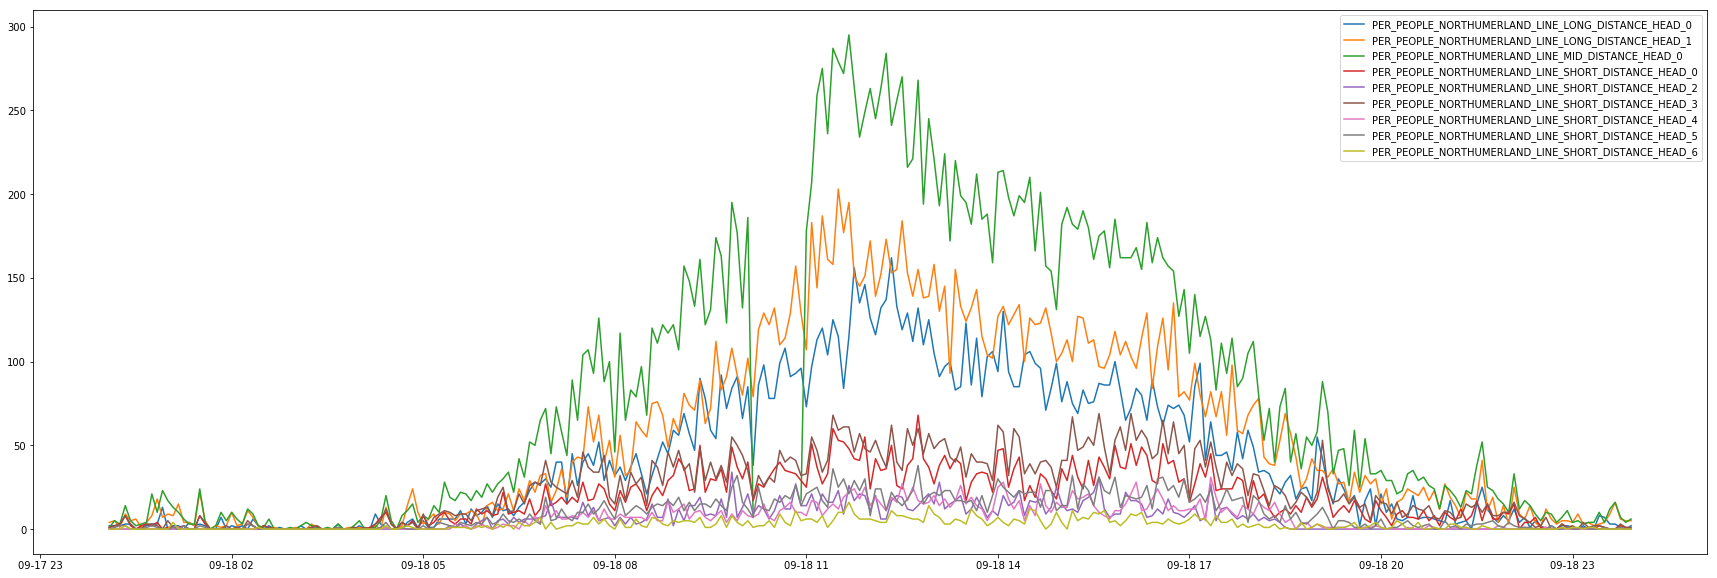

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 10))
for sensor_name, sensor_data in pedestrian_step_count_data.groupby('Sensor Name'):
    
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes, sensor_data['Value'], label = sensor_name)

    plt.legend()

**Plot of median**

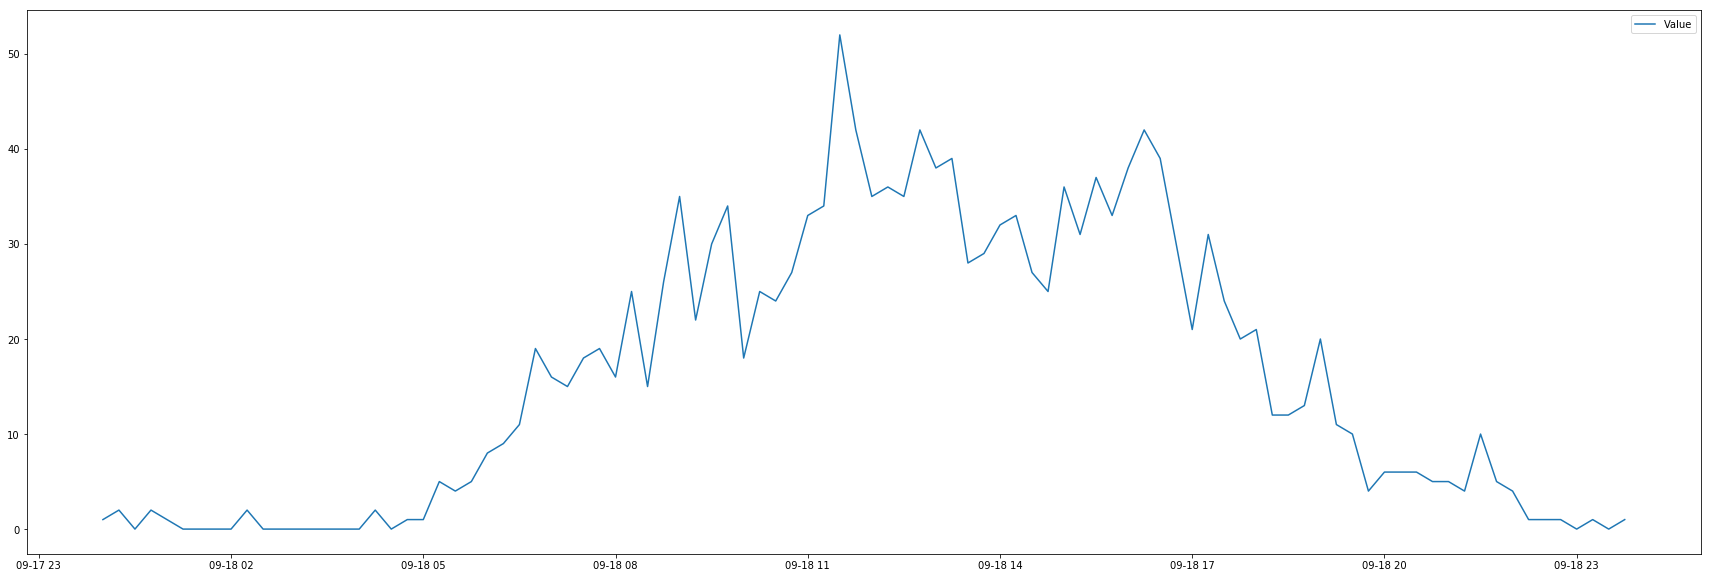

In [43]:
footfall_data_median = pedestrian_step_count_data.copy()
footfall_data_median.index = pd.to_datetime(footfall_data_median['Timestamp'])
footfall_data_median = footfall_data_median.resample('900s').median()

fig, ax = plt.subplots(figsize=(30,10))

plt.plot(footfall_data_median.index,footfall_data_median['Value'])

plt.legend()

In [42]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 8 to 2577
Data columns (total 15 columns):
Sensor Name                      287 non-null object
Variable                         287 non-null object
Units                            287 non-null object
Timestamp                        287 non-null object
Value                            287 non-null float64
Flagged as Suspect Reading       287 non-null bool
Aggregated Method                287 non-null object
Number of records                287 non-null int64
Location (WKT)                   287 non-null object
Ground Height Above Sea Level    287 non-null float64
Sensor Height Above Ground       287 non-null float64
Broker Name                      287 non-null object
Third Party                      287 non-null bool
Sensor Centroid Longitude        287 non-null float64
Sensor Centroid Latitude         287 non-null float64
dtypes: bool(2), float64(5), int64(1), object(7)
memory usage: 32.0+ KB
